In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Phase 1_Correlation Matrix for CAADRIA conference paper

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


In [20]:
data = pd.read_csv("/content/drive/MyDrive/MIZZOU/CAADRIA2022/Paper2_CAADRIA2022/_WorksForJournalPaper/Datasets/Compiled_Part1&Part2_2.csv")
data.shape
data

,FID,fid_1,full_id,osm_id,highway,name,tiger_name,tiger_na_2,tiger_zip_,NEAR_FID,...,person,bicycle,car,truck,motorcycle,Very Positive,Positive,Neutral,Negative,Very Negative
0,0,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.296296,0.090909,0.377358,0.111111,0.333333,0.547771,0.306794,0.161359,0.127389,0.304671
1,1,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.185185,0.000000,0.066038,0.166667,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
2,2,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.296296,0.000000,0.108491,0.166667,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
3,3,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.166667,0.000000,0.000000,0.333333,0.333333,0.547771,0.306794,0.161359,0.127389,0.304671
4,4,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.222222,0.000000,0.108491,0.444444,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,78,w905263472,905263472,primary,South Providence Road,,,,86,...,0.388889,0.090909,0.433962,0.555556,0.000000,0.672131,0.418033,0.098361,0.122951,0.073770
337,337,78,w905263472,905263472,primary,South Providence Road,,,,84,...,0.222222,0.000000,0.688679,0.277778,0.000000,0.600000,0.425000,0.000000,0.000000,0.300000
338,338,78,w905263472,905263472,primary,South Providence Road,,,,53,...,0.166667,0.000000,0.278302,0.222222,0.333333,0.384615,0.163462,0.115385,0.288462,0.576923
339,339,78,w905263472,905263472,primary,South Providence Road,,,,53,...,0.277778,0.000000,0.448113,0.138889,0.000000,0.384615,0.163462,0.115385,0.288462,0.576923


In [21]:
data=data.iloc[:, 16:37]
data

,sky,wall,building,fence,tree,plant,grass,road,sidewalk,streetlight,...,person,bicycle,car,truck,motorcycle,Very Positive,Positive,Neutral,Negative,Very Negative
0,0.658581,0.083490,0.289437,0.057433,0.156530,0.013000,0.000281,0.744102,0.239671,0.285390,...,0.296296,0.090909,0.377358,0.111111,0.333333,0.547771,0.306794,0.161359,0.127389,0.304671
1,0.457145,0.000204,0.478720,0.005593,0.280839,0.002257,0.000000,0.546018,0.306338,0.155534,...,0.185185,0.000000,0.066038,0.166667,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
2,0.484815,0.014946,0.582156,0.000000,0.068693,0.262181,0.000000,0.469944,0.348596,0.249199,...,0.296296,0.000000,0.108491,0.166667,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
3,0.747813,0.044860,0.402072,0.022206,0.034051,0.001592,0.014419,0.774008,0.178029,0.043276,...,0.166667,0.000000,0.000000,0.333333,0.333333,0.547771,0.306794,0.161359,0.127389,0.304671
4,0.885198,0.000000,0.111019,0.263138,0.166061,0.017144,0.091171,0.668868,0.259567,0.113023,...,0.222222,0.000000,0.108491,0.444444,0.000000,0.547771,0.306794,0.161359,0.127389,0.304671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.739058,0.004057,0.025208,0.003661,0.250236,0.007975,0.360915,0.612655,0.082960,0.388154,...,0.388889,0.090909,0.433962,0.555556,0.000000,0.672131,0.418033,0.098361,0.122951,0.073770
337,0.918643,0.000000,0.018178,0.001020,0.123482,0.005500,0.543229,0.493555,0.000000,0.213802,...,0.222222,0.000000,0.688679,0.277778,0.000000,0.600000,0.425000,0.000000,0.000000,0.300000
338,0.879575,0.016825,0.056814,0.023943,0.136135,0.027474,0.700908,0.501800,0.025213,0.325039,...,0.166667,0.000000,0.278302,0.222222,0.333333,0.384615,0.163462,0.115385,0.288462,0.576923
339,0.590135,0.020123,0.477588,0.213522,0.082838,0.000000,0.010428,0.463340,0.251106,0.112824,...,0.277778,0.000000,0.448113,0.138889,0.000000,0.384615,0.163462,0.115385,0.288462,0.576923


In [22]:
data['Very Positive'].describe()

count    341.000000
mean       0.588679
std        0.156489
min        0.000000
25%        0.547771
50%        0.617647
75%        0.660767
max        1.000000
Name: Very Positive, dtype: float64

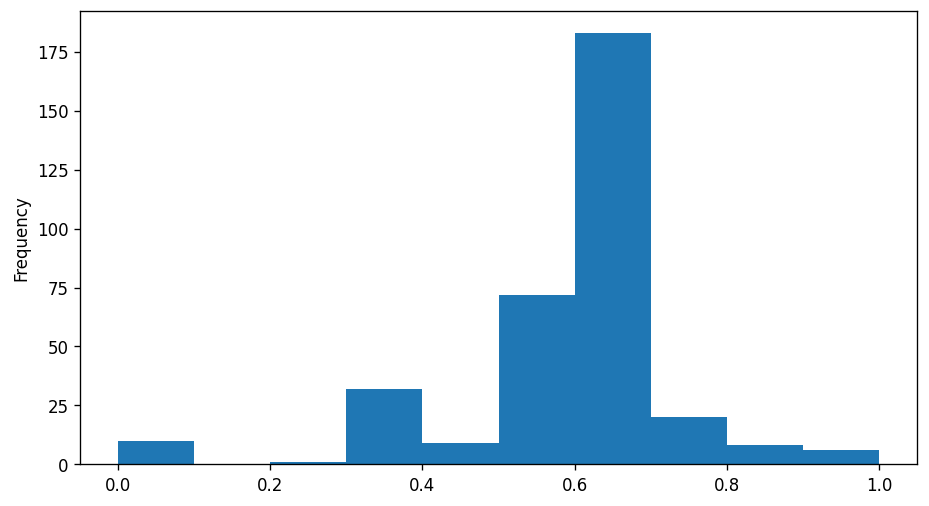

In [23]:
plt.figure(figsize = (9, 5))
data['Very Positive'].plot(kind ="hist")


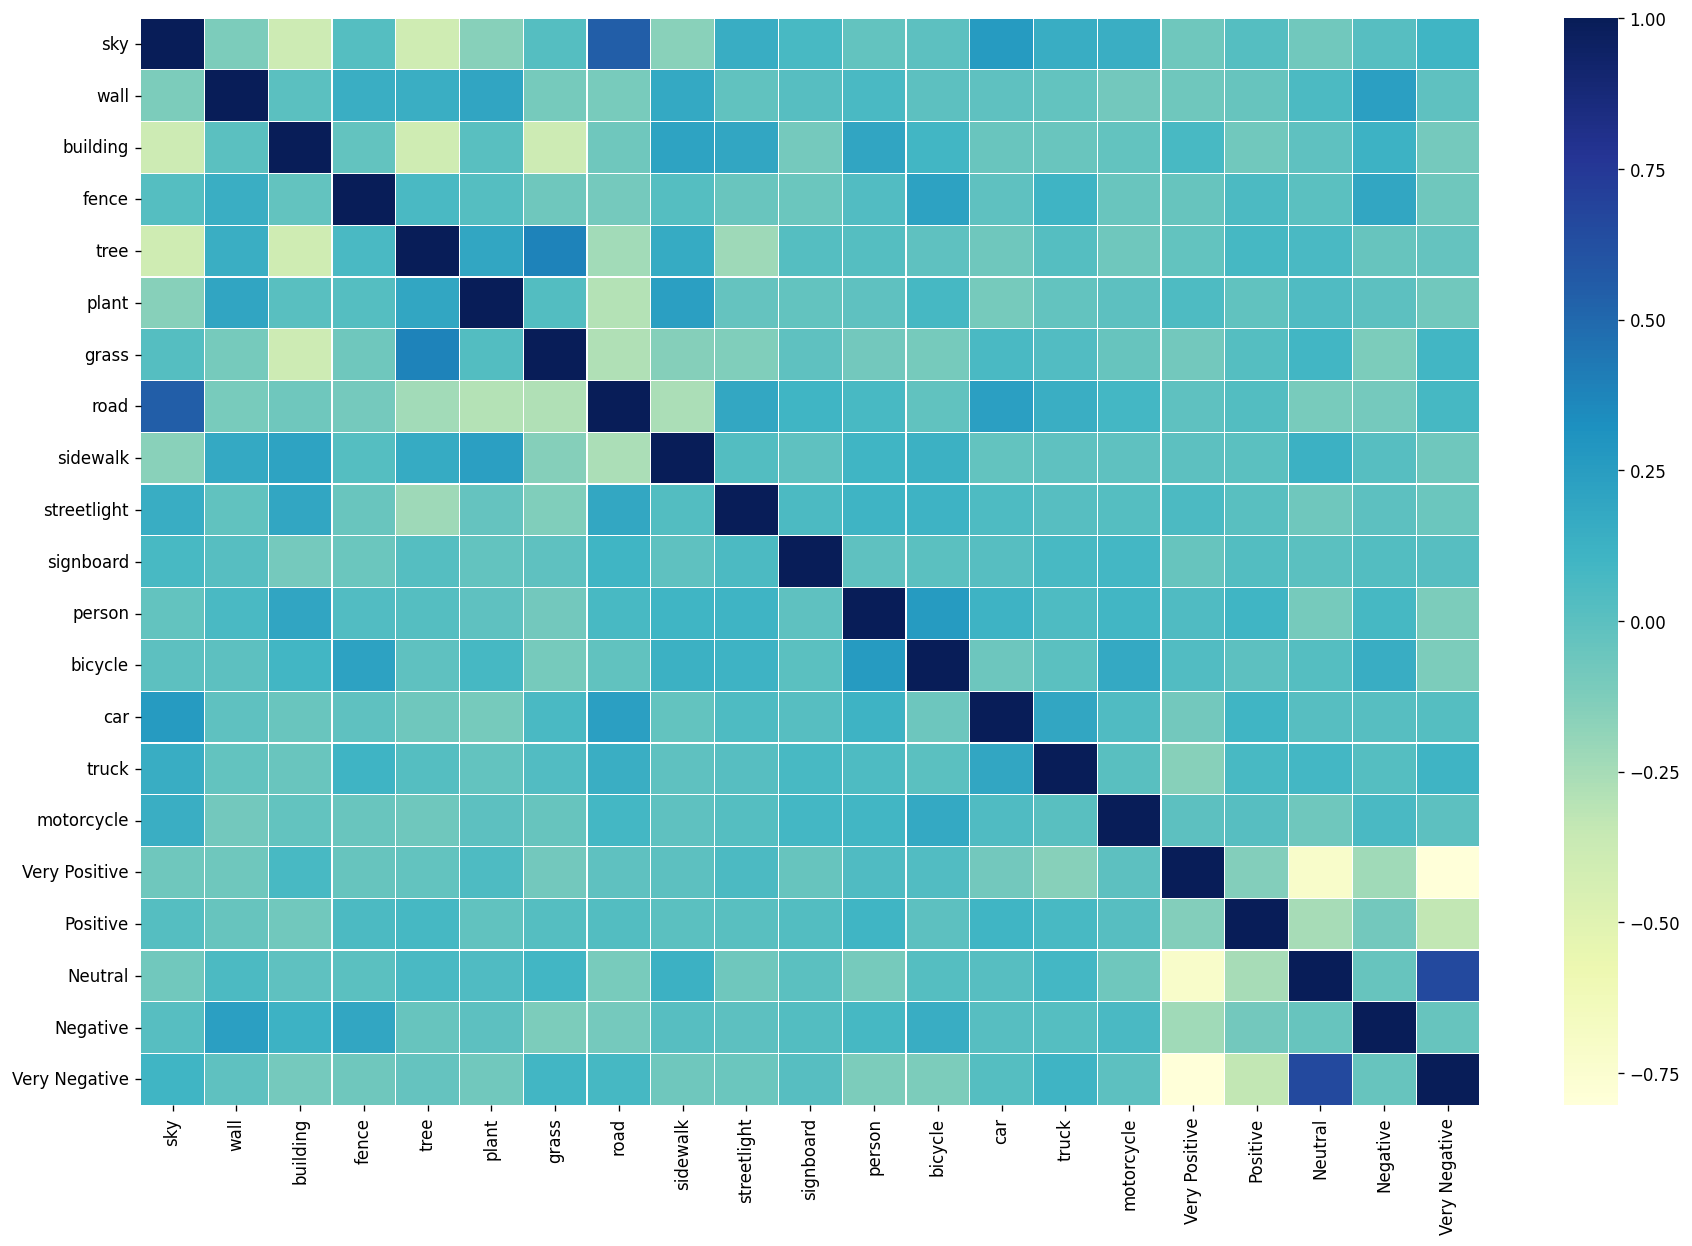

In [24]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(18, 12))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


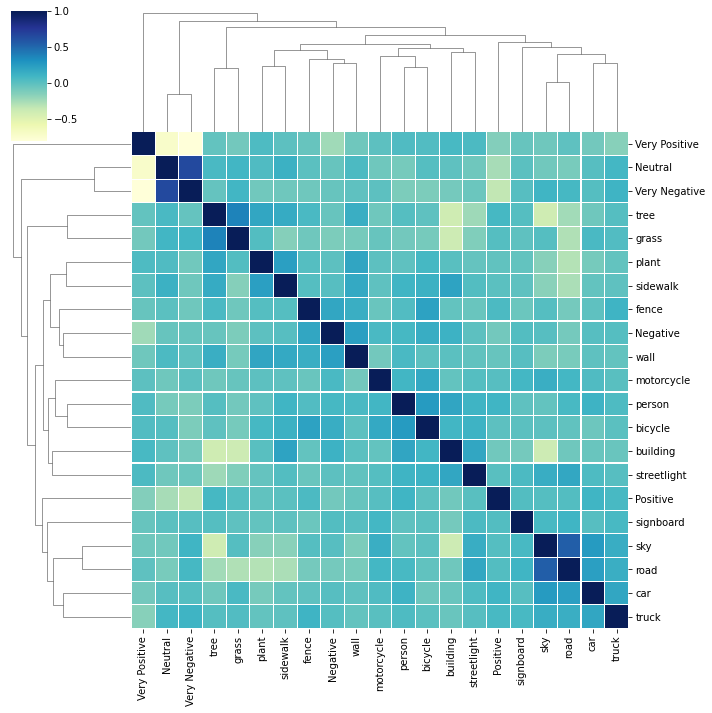

In [8]:
corrmat = data.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


In [ ]:
# # saleprice correlation matrix
# # k : number of variables for heatmap
# k = 15

# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# cm = np.corrcoef(data[cols].values.T)
# f, ax = plt.subplots(figsize =(12, 10))

# sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
# 			linewidths = 0.1, yticklabels = cols.values,
# 							xticklabels = cols.values)


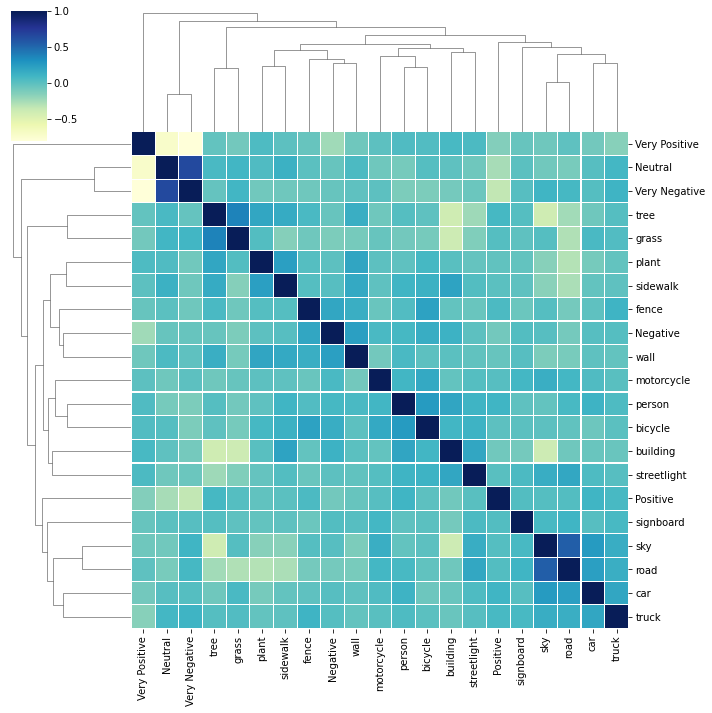

In [9]:
corrmat = data.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


Experiment for cross-correlation matrix

In [11]:
#!pip install biokit
from biokit.viz import corrplot

Populating the interactive namespace from numpy and matplotlib
Computing correlation


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


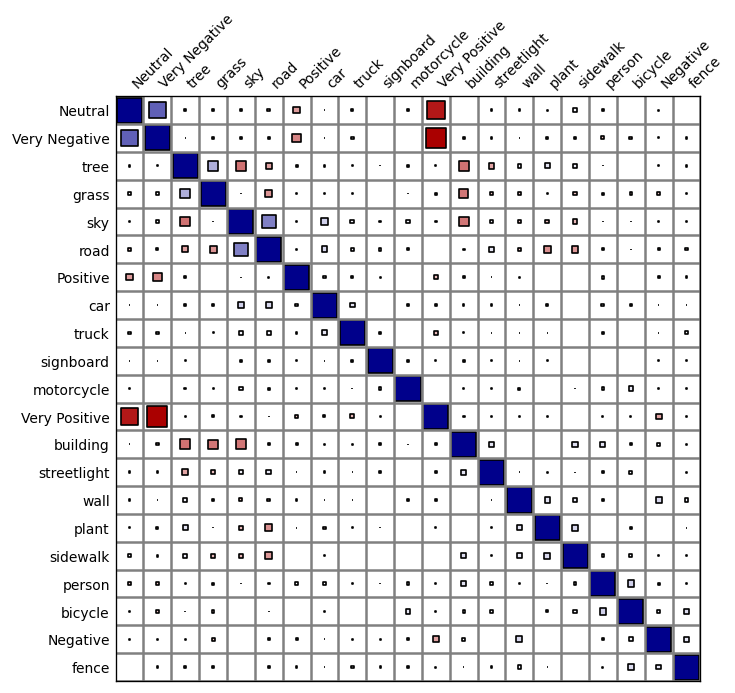

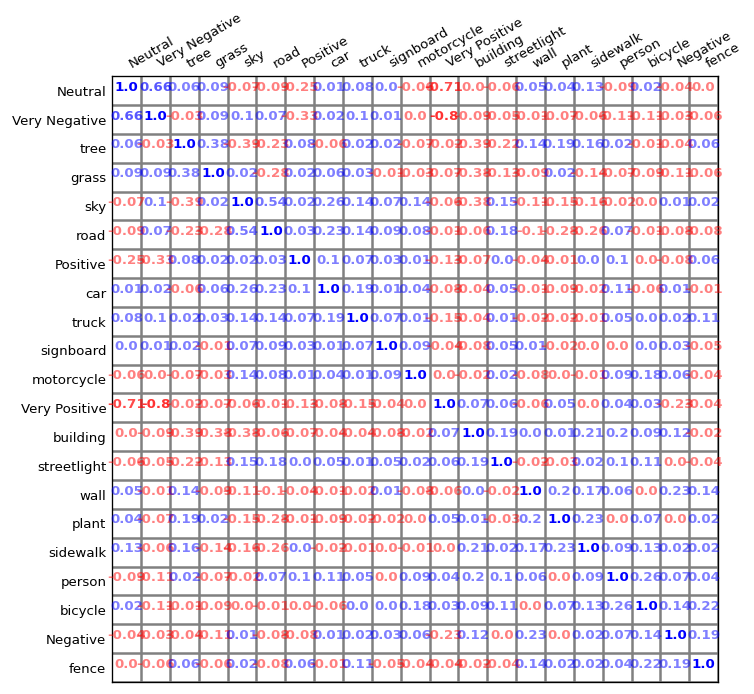

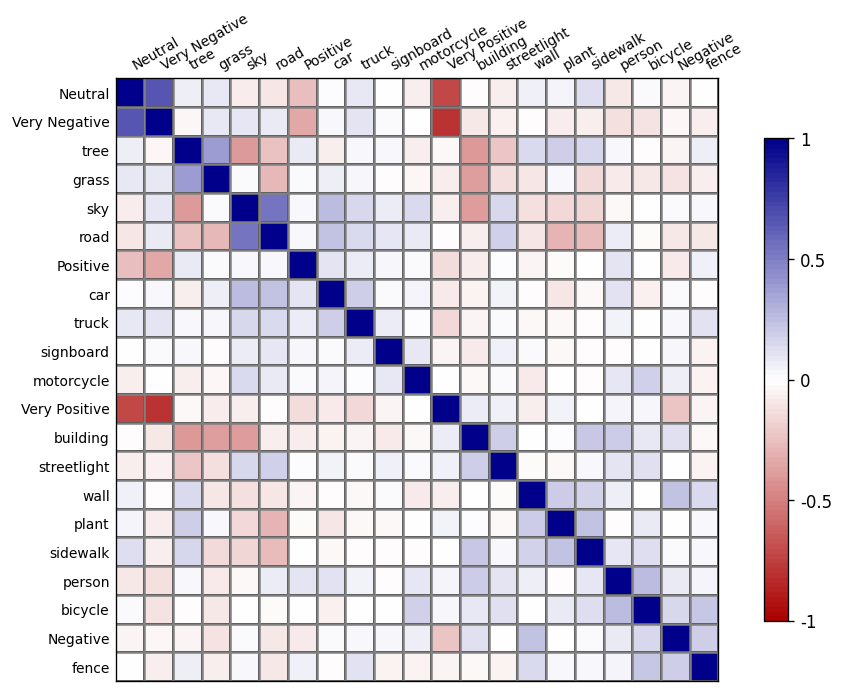

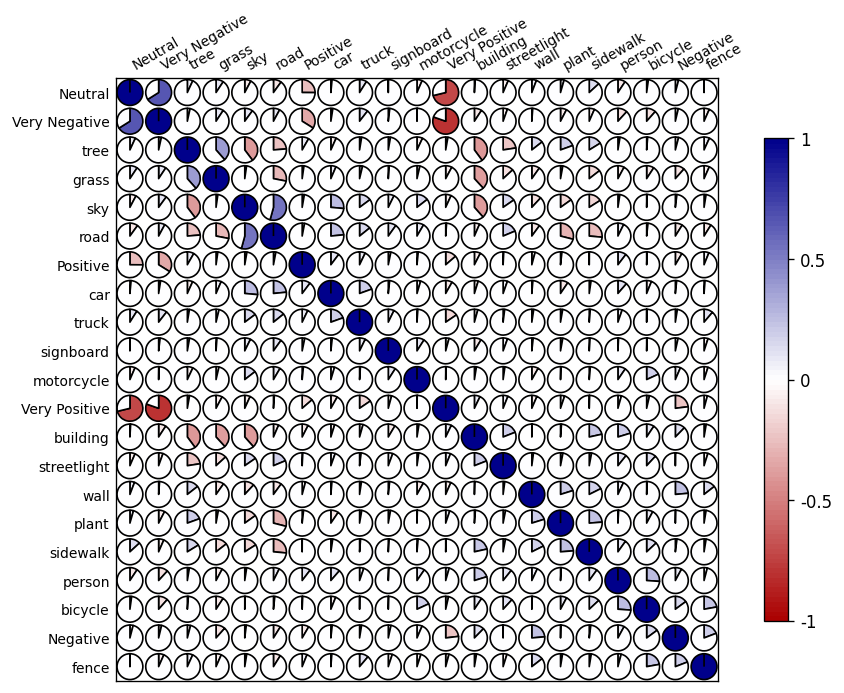

In [12]:
#source: https://nbviewer.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb
%pylab inline
import pandas as pd
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (8,6)

c = corrplot.Corrplot(data)
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=45)
c.plot(method='text', fontsize=8, colorbar=False)
c.plot(method='color')
c.plot(method='pie', shrink=.9, grid=False)

NEW EXPERIMENT_WithNewData

In [14]:
#https://github.com/mGalarnyk/Python_Tutorials/blob/master/Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb

# #https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
# data = pd.read_csv("/content/drive/MyDrive/MIZZOU/CAADRIA2022/Paper2_CAADRIA2022/StatisticalAnalysis/CompileComparisonAnalysis_CameraReady.csv")
# data.shape


In [15]:
data.columns

Index(['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative',
       'sky', 'wall', 'building', 'fence', 'tree', 'plant', 'grass', 'road',
       'sidewalk', 'streetlight', 'signboard', 'person', 'bicycle', 'car',
       'truck', 'motorcycle'],
      dtype='object')

In [17]:
data_df  = data.set_index('Very Positive')
data_df

,Positive,Neutral,Negative,Very Negative,sky,wall,building,fence,tree,plant,grass,road,sidewalk,streetlight,signboard,person,bicycle,car,truck,motorcycle
Very Positive,,,,,,,,,,,,,,,,,,,,
54.777070,14.437367,5.378627,5.095541,20.311394,0.658581,0.083490,0.289437,0.057433,0.156530,0.013000,0.000281,0.744102,0.239671,0.285390,0.016483,0.296296,0.090909,0.377358,0.111111,0.333333
54.777070,14.437367,5.378627,5.095541,20.311394,0.457145,0.000204,0.478720,0.005593,0.280839,0.002257,0.000000,0.546018,0.306338,0.155534,0.008777,0.185185,0.000000,0.066038,0.166667,0.000000
54.777070,14.437367,5.378627,5.095541,20.311394,0.484815,0.014946,0.582156,0.000000,0.068693,0.262181,0.000000,0.469944,0.348596,0.249199,0.028723,0.296296,0.000000,0.108491,0.166667,0.000000
54.777070,14.437367,5.378627,5.095541,20.311394,0.747813,0.044860,0.402072,0.022206,0.034051,0.001592,0.014419,0.774008,0.178029,0.043276,0.008858,0.166667,0.000000,0.000000,0.333333,0.333333
54.777070,14.437367,5.378627,5.095541,20.311394,0.885198,0.000000,0.111019,0.263138,0.166061,0.017144,0.091171,0.668868,0.259567,0.113023,0.009970,0.222222,0.000000,0.108491,0.444444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67.213115,19.672131,3.278689,4.918033,4.918033,0.739058,0.004057,0.025208,0.003661,0.250236,0.007975,0.360915,0.612655,0.082960,0.388154,0.070973,0.388889,0.090909,0.433962,0.555556,0.000000
60.000000,20.000000,0.000000,0.000000,20.000000,0.918643,0.000000,0.018178,0.001020,0.123482,0.005500,0.543229,0.493555,0.000000,0.213802,0.031441,0.222222,0.000000,0.688679,0.277778,0.000000
38.461538,7.692308,3.846154,11.538462,38.461538,0.879575,0.016825,0.056814,0.023943,0.136135,0.027474,0.700908,0.501800,0.025213,0.325039,0.093489,0.166667,0.000000,0.278302,0.222222,0.333333


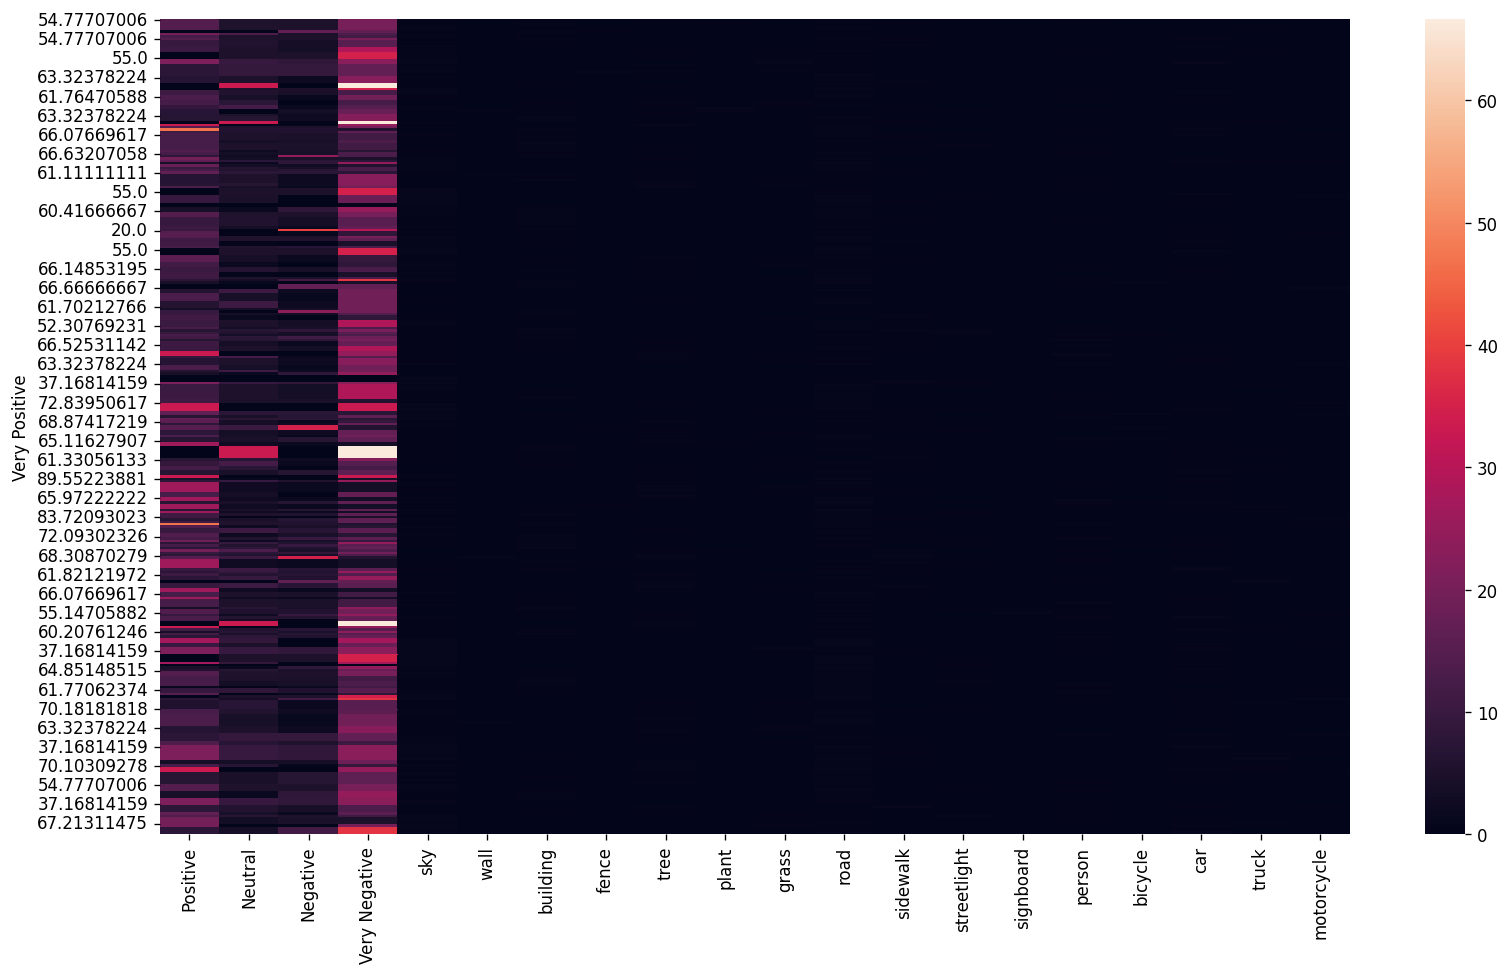

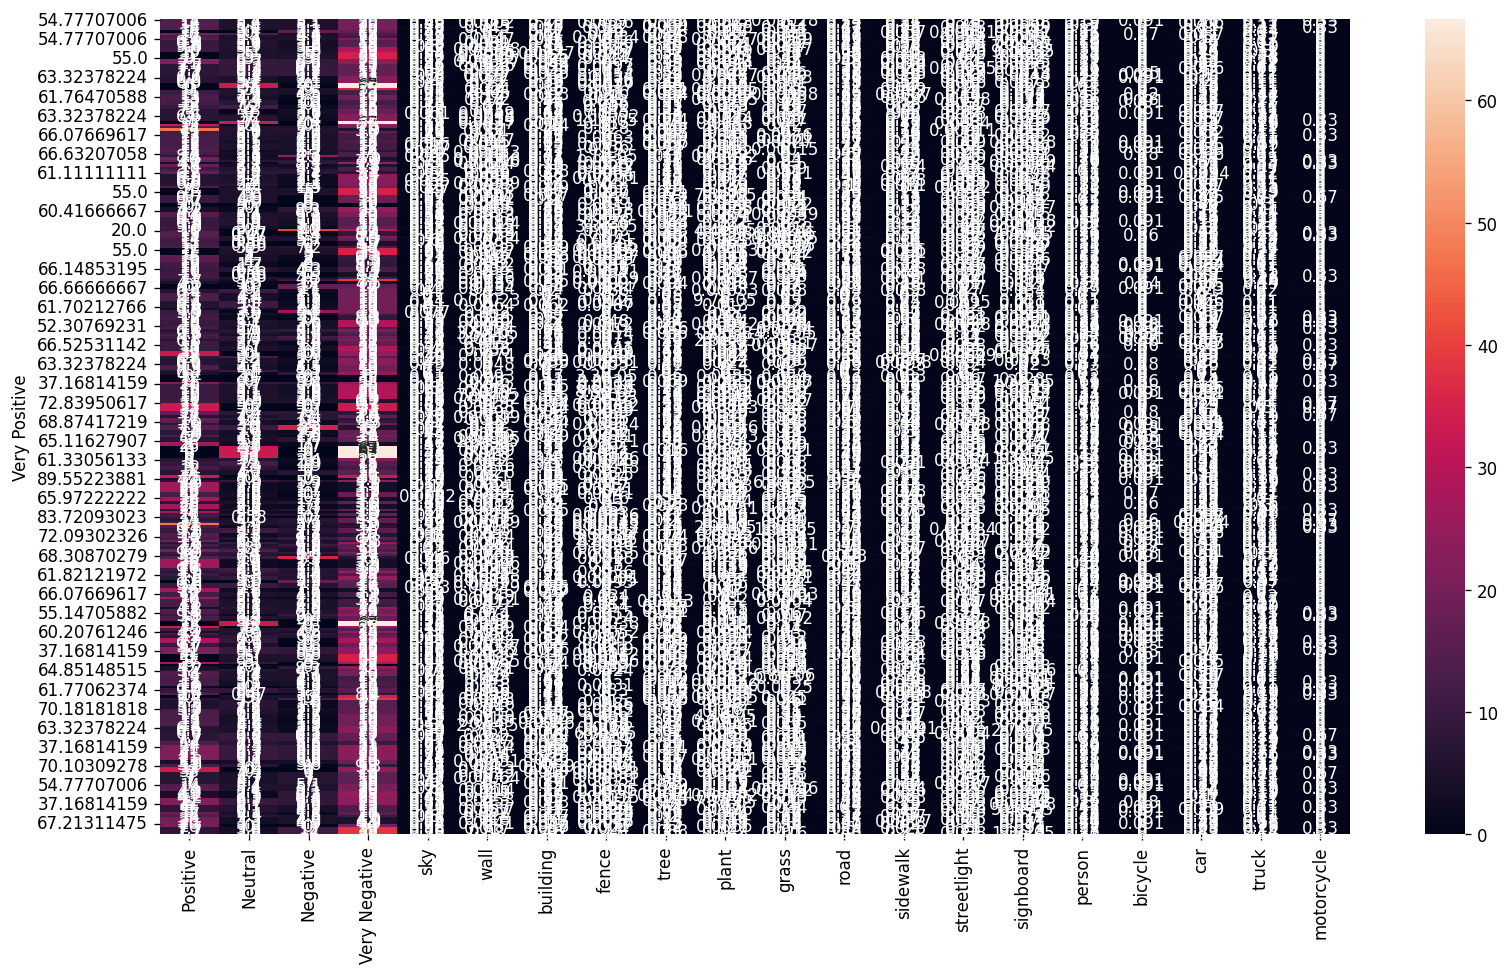

In [18]:
plt.figure(figsize=(16,9))
 
sns.heatmap(data_df)

plt.figure(figsize=(16,9))
 
sns.heatmap(data_df, annot = True)

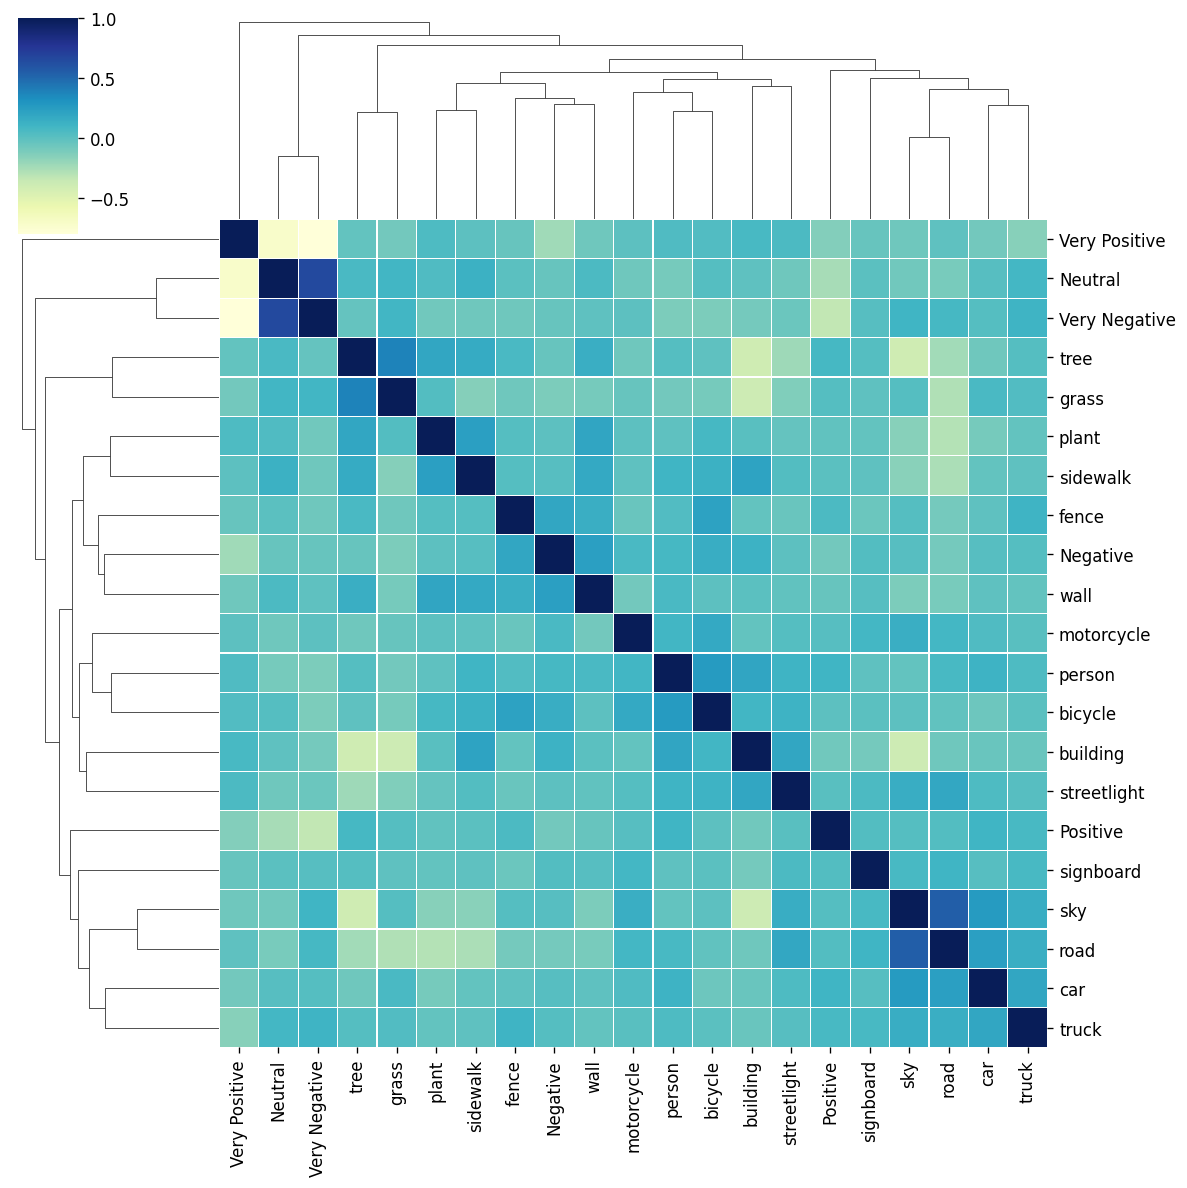

In [19]:
corrmat = data.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg

# Phase 2_ Stat for Journal Paper

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


In [11]:
data = pd.read_csv("/content/drive/MyDrive/MIZZOU/CAADRIA2022/Paper2_CAADRIA2022/_WorksForJournalPaper/Datasets/Compiled_Part1&Part2.csv")
data.shape
data

,FID,fid_1,full_id,osm_id,highway,name,tiger_name,tiger_na_2,tiger_zip_,NEAR_FID,...,grass,road,sidewalk,streetligh,signboard,person,bicycle,car,truck,motorcycle
0,0,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.000281,0.744102,0.239671,0.285390,0.016483,0.296296,0.090909,0.377358,0.111111,0.333333
1,1,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.000000,0.546018,0.306338,0.155534,0.008777,0.185185,0.000000,0.066038,0.166667,0.000000
2,2,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.000000,0.469944,0.348596,0.249199,0.028723,0.296296,0.000000,0.108491,0.166667,0.000000
3,3,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.014419,0.774008,0.178029,0.043276,0.008858,0.166667,0.000000,0.000000,0.333333,0.333333
4,4,1,w18345794,18345794,residential,North 6th Street,6th,St,65201,22,...,0.091171,0.668868,0.259567,0.113023,0.009970,0.222222,0.000000,0.108491,0.444444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,78,w905263472,905263472,primary,South Providence Road,,,,86,...,0.360915,0.612655,0.082960,0.388154,0.070973,0.388889,0.090909,0.433962,0.555556,0.000000
337,337,78,w905263472,905263472,primary,South Providence Road,,,,84,...,0.543229,0.493555,0.000000,0.213802,0.031441,0.222222,0.000000,0.688679,0.277778,0.000000
338,338,78,w905263472,905263472,primary,South Providence Road,,,,53,...,0.700908,0.501800,0.025213,0.325039,0.093489,0.166667,0.000000,0.278302,0.222222,0.333333
339,339,78,w905263472,905263472,primary,South Providence Road,,,,53,...,0.010428,0.463340,0.251106,0.112824,0.017766,0.277778,0.000000,0.448113,0.138889,0.000000


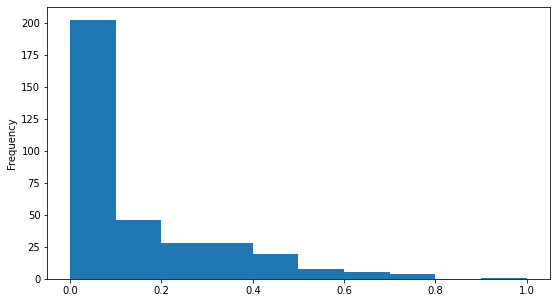

In [9]:
plt.figure(figsize = (9, 5))
data['grass'].plot(kind ="hist")


In [33]:
data_corr=data.iloc[:, 16:37]
data_corr

,Person_C,Bicycle_H,Bicycle_C,Motorcycle_H,Motorcycle_C,Car_H,Car_C,Traffic light_H,Traffic light_C
0,0.055556,0.000,0.0000,0.096296,0.133333,0.258065,0.148387,0.418605,0.000000
1,0.083333,0.000,0.0000,0.362963,0.651852,0.406452,0.638710,0.232558,0.093023
2,0.138889,0.000,0.0000,0.148148,0.051852,0.180645,0.051613,0.023256,0.023256
3,0.055556,0.125,0.0000,0.451852,0.022222,0.458065,0.019355,0.325581,0.023256
4,0.083333,0.000,0.0000,0.155556,0.007407,0.219355,0.000000,0.000000,0.023256
5,0.166667,0.000,0.0000,0.318519,0.081481,0.322581,0.085526,0.162791,0.046512
6,0.222222,0.250,0.3125,0.140741,0.088889,0.193548,0.046053,0.139535,0.023256
7,0.055556,0.000,0.0000,0.348148,0.029630,0.496774,0.006579,0.441860,0.000000
8,0.111111,0.250,0.0000,0.288889,0.155556,0.335484,0.138158,0.046512,0.046512
9,0.222222,0.000,0.0000,0.185185,0.118519,0.164474,0.078947,0.000000,0.139535
